# Mini Project 1



**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

In [3]:
tickers = ['AAPL', 'MSFT','AMZN', 'META']

In [4]:
start_date = dt.datetime.today()-dt.timedelta(days = 365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

C:\Users\62782\AppData\Local\Temp\ipykernel_31644\3104739845.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  4 of 4 completed


In [5]:
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

In [6]:
covariance_matrix = 252*((daily_returns).cov())

In [7]:
n_assets = len(tickers)

In [8]:
initial_weights = np.array([1/n_assets] * n_assets)

In [9]:
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
               {'type': 'ineq', 'fun': lambda weights: .35-max(weights)})

In [10]:
def high_risk_portfolio_volatility(weights):
    high_risk_portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return high_risk_portfolio_std_dev

In [11]:
result = minimize(high_risk_portfolio_volatility, initial_weights, constraints=constraints)

In [12]:
optimal_weights = result.x
optimal_vol = result.fun

In [13]:
print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
AAPL: Weight = 0.3500
MSFT: Weight = 0.1637
AMZN: Weight = 0.1363
META: Weight = 0.3500


In [26]:
high_risk_portfolio_daily_returns = daily_returns.dot(optimal_weights)

In [48]:
print(high_risk_portfolio_daily_returns)

Date
2024-07-23    0.006929
2024-07-24   -0.035836
2024-07-25   -0.013593
2024-07-26    0.012495
2024-07-29    0.002279
                ...   
2025-07-16   -0.002130
2025-07-17    0.004165
2025-07-18    0.002991
2025-07-21    0.006105
2025-07-22   -0.003035
Length: 250, dtype: float64


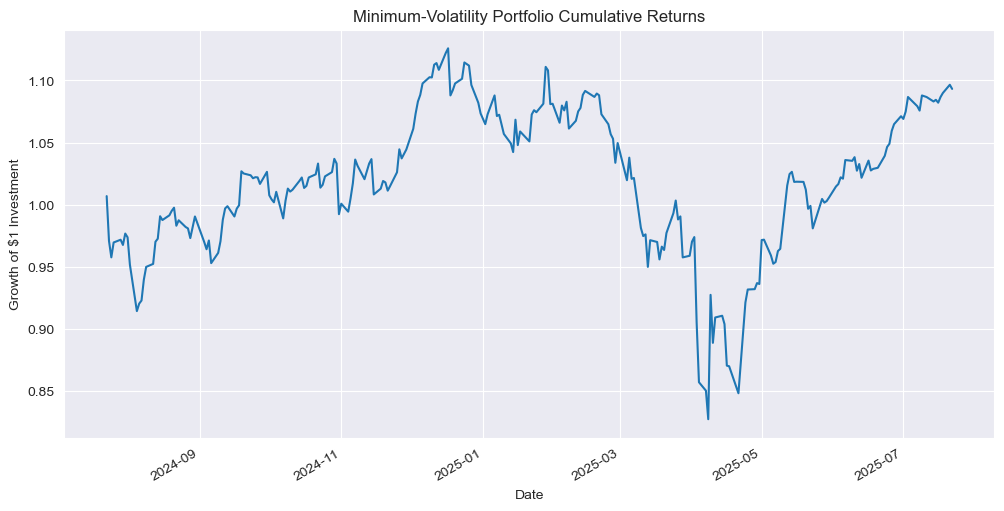

In [50]:
cumulative_returns = (1 + high_risk_portfolio_daily_returns).cumprod()

plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title('Minimum-Volatility Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Growth of $1 Investment')
plt.grid(True)
plt.show()

In [14]:
def low_risk_portfolio_volatility(weights):
    low_risk_portfolio_std_dev = -1*np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return low_risk_portfolio_std_dev

In [15]:
result = minimize(low_risk_portfolio_volatility, initial_weights, constraints=constraints)

In [16]:
low_risk_optimal_weights = result.x
low_risk_optimal_vol = result.fun

In [20]:
print("\nOptimal Asset Weights to Maximize Volatility:")
for ticker, weight in zip(tickers, low_risk_optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")


Optimal Asset Weights to Maximize Volatility:
AAPL: Weight = 0.2000
MSFT: Weight = 0.3500
AMZN: Weight = 0.3500
META: Weight = 0.1000


In [44]:
low_risk_portfolio_daily_returns = daily_returns.dot(low_risk_optimal_weights)

In [54]:
print(low_risk_portfolio_daily_returns)

Date
2024-07-23    0.009614
2024-07-24   -0.040334
2024-07-25   -0.011359
2024-07-26    0.016540
2024-07-29    0.001947
                ...   
2025-07-16   -0.007663
2025-07-17    0.001395
2025-07-18    0.005708
2025-07-21    0.010394
2025-07-22   -0.005978
Length: 250, dtype: float64


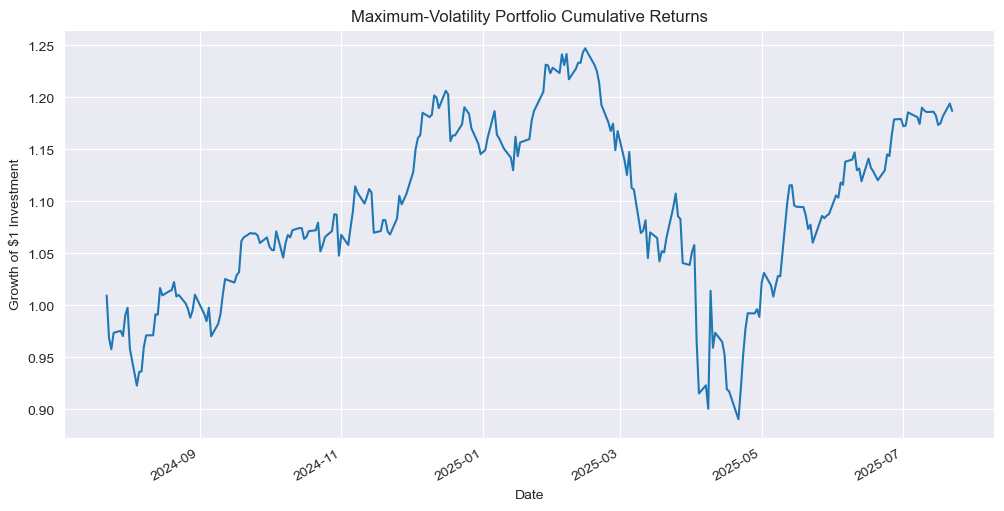

In [58]:
low_cumulative_returns = (1 + low_risk_portfolio_daily_returns).cumprod()

plt.figure(figsize=(12, 6))
low_cumulative_returns.plot()
plt.title('Maximum-Volatility Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Growth of $1 Investment')
plt.grid(True)
plt.show()

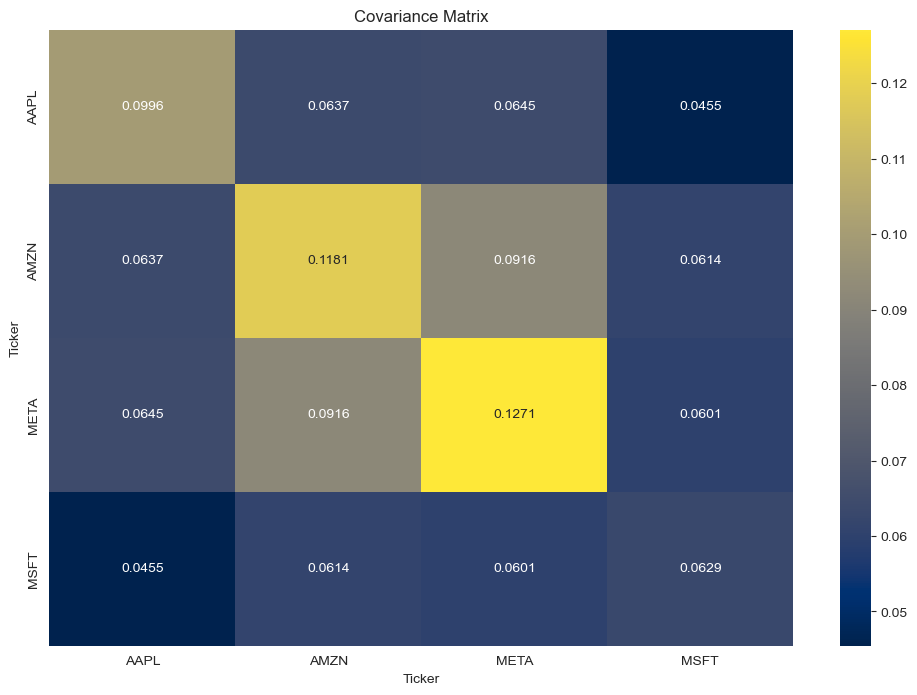

In [22]:
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()